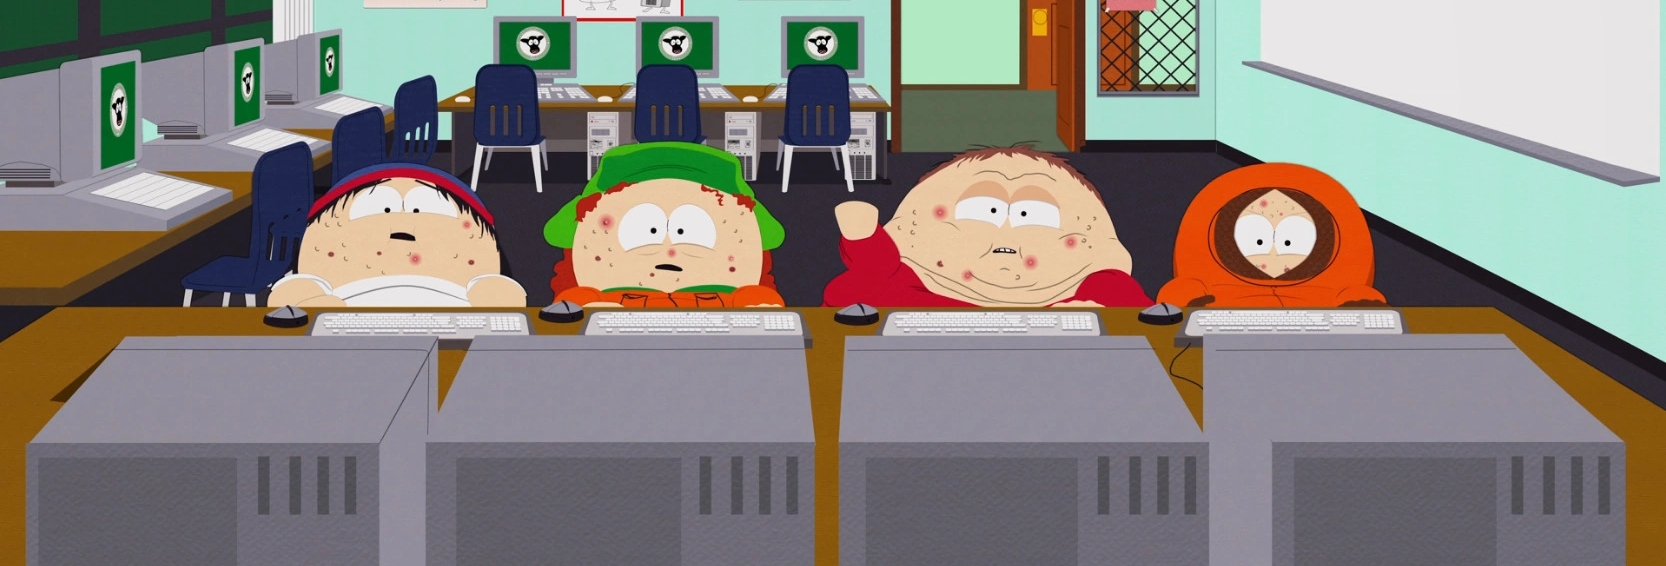

# Acquire data

In this notebook we're going to do some webscraping to acquire our data. We're looking to scrape each script for each episode within each season of South Park. The show first episode aired in 1998, and it is currently on its 26th season. There are 321 eps in total. The output that we want is a pandas dataframe with the following columns:

* Season number
* Episode number
* Episode title
* Url
* Script contents

To do this I'll be using the requests module, along with BeautifulSoup (to scrape the data), and pandas (to transform our list of dictionaries containing the scraped content to a dataframe). 

## Import necessary libraries

In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Start scraping...

First we'll start with the scripts portal which contains links to scripts for each season. We'll need to acquire these links first, then dive into them further to scrape the data for each individual episode. 

In [2]:
url = 'https://southpark.fandom.com/wiki/Portal:Scripts'
reqs = requests.get(url)

In [3]:
# Success

reqs

<Response [200]>

In [4]:
soup = BeautifulSoup(reqs.text, 'html.parser')

## Acquire season links

In [5]:
szn_urls = []
seasons = []

for div in soup.findAll('div', {'class': 'lightbox-caption'}):
    a = div.find('a')
    seasons.append(a.text.strip())
    print(a.text.strip())
    print(a.attrs['href'])
    szn_urls.append('https://southpark.fandom.com'+a.attrs['href'])

Season One
/wiki/Portal:Scripts/Season_One
Season Two
/wiki/Portal:Scripts/Season_Two
Season Three
/wiki/Portal:Scripts/Season_Three
Season Four
/wiki/Portal:Scripts/Season_Four
Season Five
/wiki/Portal:Scripts/Season_Five
Season Six
/wiki/Portal:Scripts/Season_Six
Season Seven
/wiki/Portal:Scripts/Season_Seven
Season Eight
/wiki/Portal:Scripts/Season_Eight
Season Nine
/wiki/Portal:Scripts/Season_Nine
Season Ten
/wiki/Portal:Scripts/Season_Ten
Season Eleven
/wiki/Portal:Scripts/Season_Eleven
Season Twelve
/wiki/Portal:Scripts/Season_Twelve
Season Thirteen
/wiki/Portal:Scripts/Season_Thirteen
Season Fourteen
/wiki/Portal:Scripts/Season_Fourteen
Season Fifteen
/wiki/Portal:Scripts/Season_Fifteen
Season Sixteen
/wiki/Portal:Scripts/Season_Sixteen
Season Seventeen
/wiki/Portal:Scripts/Season_Seventeen
Season Eighteen
/wiki/Portal:Scripts/Season_Eighteen
Season Nineteen
/wiki/Portal:Scripts/Season_Nineteen
Season Twenty
/wiki/Portal:Scripts/Season_Twenty
Season Twenty-One
/wiki/Portal:Scrip

In [6]:
szn_urls

['https://southpark.fandom.com/wiki/Portal:Scripts/Season_One',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Two',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Three',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Four',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Five',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Six',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Seven',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Eight',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Nine',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Ten',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Eleven',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Twelve',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Thirteen',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Fourteen',
 'https://southpark.fandom.com/wiki/Portal:Scripts/Season_Fifteen',
 'https://s

In [7]:
seasons

['Season One',
 'Season Two',
 'Season Three',
 'Season Four',
 'Season Five',
 'Season Six',
 'Season Seven',
 'Season Eight',
 'Season Nine',
 'Season Ten',
 'Season Eleven',
 'Season Twelve',
 'Season Thirteen',
 'Season Fourteen',
 'Season Fifteen',
 'Season Sixteen',
 'Season Seventeen',
 'Season Eighteen',
 'Season Nineteen',
 'Season Twenty',
 'Season Twenty-One',
 'Season Twenty-Two',
 'Season Twenty-Three',
 'Season Twenty-Four',
 'Season Twenty-Five',
 'Season Twenty-Six']

## Acquire episode links and script text

Now that we have the links for each season, we'll go into these links and scrape each episode link within each season. Then, you guessed it, we'll scrape the contents of these episode links which contain the script for that particular episode. To achieve this I've created a variable 'data' which is a list of dictionaries containing the information that we'll want in our eventual dataframe columns.

In [41]:
data = []
links = []
szn = 0



for i in szn_urls:
    url = i
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    szn += 1

    ep = 0
    
    for div in soup.findAll('div', {'class': 'lightbox-caption'}):
        a = div.find('a')
        ep += 1


        title = a.text.strip()
        link = a.attrs['href']

        links.append('https://southpark.fandom.com'+link)
        
        data.append({'season': "SEASON "+str(szn), 'episode': ep, 'title': title, 'url': 'https://southpark.fandom.com'+link})

        
scripts = []
for i in links:
    url = i
        
    ep_reqs = requests.get(url)
    ep_soup = BeautifulSoup(ep_reqs.text, 'html.parser')

        
    for script in ep_soup(["script", "style"]):
#        print("EXTRACTING")
        script.extract()
            
    text = ep_soup.get_text()
        


    # creates generator that goes through each line of the text and removes leading or trailing whitespace
    lines = (line.strip() for line in text.splitlines())
    
    
    
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    
    
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)

    scripts.append(text)        
    

In [48]:
# Loop over the range of indices from 0 to the length of the 'data' list
for i in range(len(data)):
    # Access the i-th dictionary in the 'data' list and add a new key 'scripts'
    # The value for this new key is taken from the i-th element in the 'scripts' list
    data[i]['scripts'] = scripts[i]

## Transform list of dictionaries into dataframe

In [53]:
df = pd.DataFrame(data)

In [64]:
df

,season,episode,title,url,scripts
0,SEASON 1,1,Cartman Gets an Anal Probe,https://southpark.fandom.com/wiki/Cartman_Gets...,Cartman Gets an Anal Probe/Script | South Park...
1,SEASON 1,2,Weight Gain 4000,https://southpark.fandom.com/wiki/Weight_Gain_...,Weight Gain 4000/Script | South Park Archives ...
2,SEASON 1,3,Volcano,https://southpark.fandom.com/wiki/Volcano/Script,Volcano/Script | South Park Archives | Fandom\...
3,SEASON 1,4,Big Gay Al's Big Gay Boat Ride,https://southpark.fandom.com/wiki/Big_Gay_Al%2...,Big Gay Al's Big Gay Boat Ride/Script | South ...
4,SEASON 1,5,An Elephant Makes Love to a Pig,https://southpark.fandom.com/wiki/An_Elephant_...,An Elephant Makes Love to a Pig/Script | South...
...,...,...,...,...,...
316,SEASON 26,2,The Worldwide Privacy Tour,https://southpark.fandom.com/wiki/The_Worldwid...,The Worldwide Privacy Tour/Script | South Park...
317,SEASON 26,3,Japanese Toilet,https://southpark.fandom.com/wiki/Japanese_Toi...,Japanese Toilet/Script | South Park Archives |...
318,SEASON 26,4,Deep Learning,https://southpark.fandom.com/wiki/Deep_Learnin...,Deep Learning/Script | South Park Archives | F...
319,SEASON 26,5,DikinBaus Hot Dogs,https://southpark.fandom.com/wiki/DikinBaus_Ho...,DikinBaus Hot Dogs/Script | South Park Archive...


# Export data to csv

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   321 non-null    object
 1   episode  321 non-null    int64 
 2   title    321 non-null    object
 3   url      321 non-null    object
 4   scripts  321 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.7+ KB


In [56]:
import os

os.getcwd()

'/Users/loucap/Documents/GitWork/SNA'

In [65]:
df.to_csv('Raw_data/scripts.csv', index = False)